<a href="https://colab.research.google.com/github/ilhamputra12/deteksigambar_/blob/main/detection_meja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Step 1: Install necessary libraries
!pip install ultralytics  # Install YOLOv8
!pip install matplotlib opencv-python-headless
!pip install roboflow

In [7]:
# Step 2: Import libraries
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files
import cv2
import numpy as np

In [8]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="p9AE4cfyWZVtKr7MenmF")
# project = rf.workspace("testingws").project("object-detection-bbaki")
# version = project.version(3)
# dataset = version.download("yolov8")

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WqbMxdvJ8J4QM4lGbwiE")
project = rf.workspace("ilham-n9nca").project("deteksi-meja-crpzj")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to deteksi-meja-6 in yolov8:: 100%|██████████| 396/396 [00:00<00:00, 5248.89it/s]


In [9]:
import os

# Lihat folder tempat dataset diunduh
dataset_location = dataset.location  # dari RoboFlow download
print("Dataset downloaded to:", dataset_location)

Dataset downloaded to: /content/deteksi-meja-6


In [10]:
from ultralytics import YOLO

# Buat model YOLOv8 baru
model = YOLO("yolov8n.pt")  # "yolov8n.pt" adalah versi YOLOv8 Nano

# Jalankan pelatihan dengan dataset
model.train(data="/content/deteksi-meja-6/data.yaml", epochs=25, imgsz=320)

100%|██████████| 6.25M/6.25M [00:00<00:00, 82.5MB/s]


Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/deteksi-meja-6/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

100%|██████████| 755k/755k [00:00<00:00, 28.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/deteksi-meja-6/train/labels... 168 images, 0 backgrounds, 0 corrupt: 100%|██████████| 168/168 [00:00<00:00, 996.35it/s]

train: New cache created: /content/deteksi-meja-6/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 210, len(boxes) = 213. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/deteksi-meja-6/valid/labels... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<00:00, 1594.00it/s]

val: New cache created: /content/deteksi-meja-6/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25         0G      2.152      3.254      1.918         18        320: 100%|██████████| 11/11 [00:42<00:00,  3.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.98s/it]

                   all         16         22     0.0046      0.955      0.362      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25         0G      1.723      2.322      1.643         14        320: 100%|██████████| 11/11 [00:40<00:00,  3.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]

                   all         16         22      0.891      0.372      0.718      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25         0G      1.634      1.944      1.571         25        320: 100%|██████████| 11/11 [00:37<00:00,  3.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         16         22    0.00488      0.955      0.662      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25         0G      1.577       1.72      1.471         30        320: 100%|██████████| 11/11 [00:39<00:00,  3.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]

                   all         16         22      0.579      0.273      0.517      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25         0G      1.499      1.565      1.464         20        320: 100%|██████████| 11/11 [00:38<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

                   all         16         22      0.722      0.473      0.491      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25         0G      1.481      1.538      1.427         22        320: 100%|██████████| 11/11 [00:39<00:00,  3.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

                   all         16         22      0.594      0.364      0.472      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25         0G      1.492      1.445      1.418         20        320: 100%|██████████| 11/11 [00:38<00:00,  3.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all         16         22      0.662      0.545       0.49      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25         0G       1.45       1.36      1.375         27        320: 100%|██████████| 11/11 [00:39<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.34s/it]

                   all         16         22      0.731      0.494      0.574      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25         0G      1.381      1.286      1.344         21        320: 100%|██████████| 11/11 [00:38<00:00,  3.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

                   all         16         22      0.634      0.636      0.682      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25         0G      1.401      1.247      1.366         21        320: 100%|██████████| 11/11 [00:38<00:00,  3.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all         16         22      0.657      0.636      0.688      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25         0G      1.297      1.204      1.321         16        320: 100%|██████████| 11/11 [00:38<00:00,  3.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]

                   all         16         22      0.299      0.318      0.222      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25         0G      1.284      1.148      1.291         22        320: 100%|██████████| 11/11 [00:37<00:00,  3.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.76s/it]

                   all         16         22      0.825      0.636      0.744      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25         0G       1.31      1.135      1.302         18        320: 100%|██████████| 11/11 [00:39<00:00,  3.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all         16         22      0.807      0.761      0.777       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25         0G      1.208      1.075      1.254         15        320: 100%|██████████| 11/11 [00:38<00:00,  3.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]

                   all         16         22      0.742      0.818      0.755      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25         0G      1.205     0.9996      1.224         18        320: 100%|██████████| 11/11 [00:38<00:00,  3.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

                   all         16         22      0.817      0.814      0.809      0.486


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25         0G      1.145      0.989      1.256         11        320: 100%|██████████| 11/11 [00:39<00:00,  3.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all         16         22       0.79      0.636      0.712      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25         0G      1.068     0.9181      1.207         10        320: 100%|██████████| 11/11 [00:38<00:00,  3.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]

                   all         16         22      0.839      0.773      0.759      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25         0G      1.027     0.8187      1.168          9        320: 100%|██████████| 11/11 [00:37<00:00,  3.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         16         22      0.763      0.682      0.719      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25         0G     0.9703     0.7615      1.118         10        320: 100%|██████████| 11/11 [00:37<00:00,  3.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]

                   all         16         22       0.81      0.773      0.745      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25         0G     0.9464     0.7931      1.157          9        320: 100%|██████████| 11/11 [00:38<00:00,  3.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

                   all         16         22      0.766      0.636      0.718       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25         0G     0.9127     0.7424      1.094         16        320: 100%|██████████| 11/11 [00:38<00:00,  3.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

                   all         16         22       0.66      0.727      0.726      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25         0G     0.9022     0.6925      1.114          8        320: 100%|██████████| 11/11 [00:38<00:00,  3.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

                   all         16         22      0.735      0.758      0.733      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25         0G     0.8415     0.6592      1.081         10        320: 100%|██████████| 11/11 [00:37<00:00,  3.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         16         22       0.79      0.773      0.733      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25         0G     0.8273     0.6605      1.057          9        320: 100%|██████████| 11/11 [00:37<00:00,  3.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all         16         22       0.79      0.773      0.742      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25         0G     0.8036     0.6583      1.062         12        320: 100%|██████████| 11/11 [00:37<00:00,  3.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

                   all         16         22      0.762      0.773      0.741      0.489



25 epochs completed in 0.286 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]


                   all         16         22      0.817      0.813      0.809      0.486
Speed: 0.7ms preprocess, 69.6ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c294cd5b250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [11]:
from ultralytics import YOLO

# Muat model terlatih
model = YOLO("/content/runs/detect/train/weights/best.pt")

In [12]:
dataset = version.download("yolov8")

In [14]:
# result = model.predict(source="/content/gol3.png", save=True, imgsz=320)

image_path = "/content/hq720.jpg"
gray_image_path = "/content/img1_gray.png"

# Baca gambar
image = cv2.imread(image_path)

# Ubah ke grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Simpan gambar grayscale
cv2.imwrite(gray_image_path, gray_image)



result = model.predict(source="/content/hq720.jpg", imgsz=640, save=True)


image 1/1 /content/hq720.jpg: 448x640 1 meja, 181.6ms
Speed: 4.0ms preprocess, 181.6ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


Bounding Box: (247.80, 270.24, 501.53, 487.01)
Confidence: 0.88
Class ID: 0
Total Bounding Boxes: 1


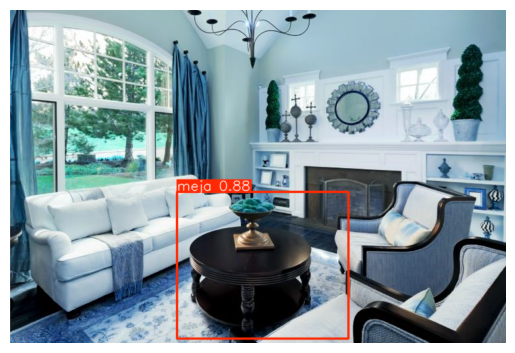

In [15]:
# Ambil elemen pertama dari hasil prediksi
image_result = result[0]

# Ekstrak bounding box, confidence, dan class
for box in image_result.boxes.data:
    # box adalah tensor [x_min, y_min, x_max, y_max, confidence, class]
    x_min, y_min, x_max, y_max, confidence, class_id = box.tolist()

    # Cetak bounding box
    print(f"Bounding Box: ({x_min:.2f}, {y_min:.2f}, {x_max:.2f}, {y_max:.2f})")
    print(f"Confidence: {confidence:.2f}")
    print(f"Class ID: {int(class_id)}")

# Menghitung jumlah bounding box
total_bounding_boxes = len(image_result.boxes.data)
print(f"Total Bounding Boxes: {total_bounding_boxes}")

# Menampilkan hasil deteksi
from IPython.display import Image, display
image_path_with_predictions = image_result.plot()  # Mengembalikan array gambar

# Tampilkan menggunakan Matplotlib
import matplotlib.pyplot as plt
plt.imshow(image_path_with_predictions)
plt.axis("off")
plt.show()

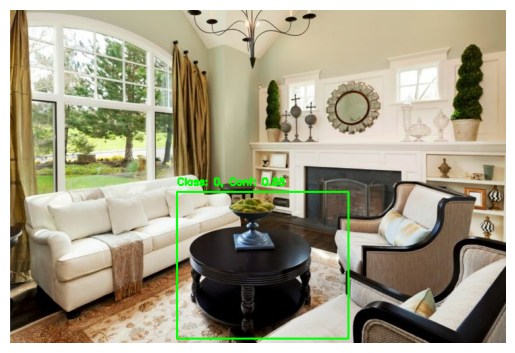

In [16]:
import cv2

# Buka gambar asli
img = cv2.imread("/content/hq720.jpg")

# Loop untuk menggambar bounding box
for box in image_result.boxes.data:
    x_min, y_min, x_max, y_max, confidence, class_id = box.tolist()
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)

    # Gambar bounding box
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    label = f"Class: {int(class_id)}, Conf: {confidence:.2f}"
    cv2.putText(img, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Tampilkan gambar dengan Matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [17]:
!ls runs/detect/predict

hq720.jpg


In [18]:
# Step 3: Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

Saving 5 Inspirasi Dekorasi Ruang Tamu Sederhana Tapi Menarik di 2023!.jpg to 5 Inspirasi Dekorasi Ruang Tamu Sederhana Tapi Menarik di 2023!.jpg


In [19]:
# Step 4: Load YOLO model
model = YOLO('yolov8n.pt')  # Use a pre-trained YOLOv8 model (nano version for speed)

In [20]:
# Step 5: Perform object detection
results = model(image_path)  # Run inference on the uploaded image


image 1/1 /content/5 Inspirasi Dekorasi Ruang Tamu Sederhana Tapi Menarik di 2023!.jpg: 448x640 2 chairs, 2 couchs, 1 potted plant, 332.8ms
Speed: 11.4ms preprocess, 332.8ms inference, 10.4ms postprocess per image at shape (1, 3, 448, 640)


In [21]:
# Step 6: Visualize results
# Save the annotated image
annotated_img = results[0].plot()  # Create an annotated image (numpy array)

In [22]:
cv2.imwrite("runs/detect/Mark Holcomb.jpeg", annotated_img)

True

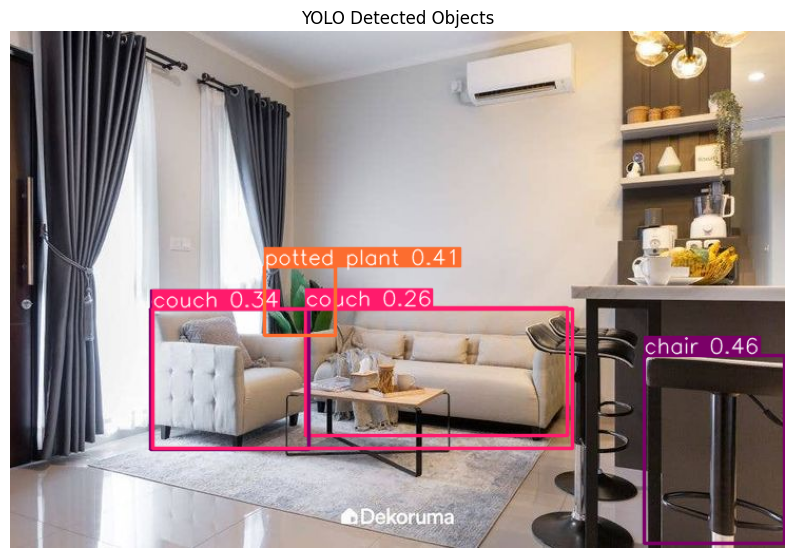

In [23]:
# Display the annotated image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("YOLO Detected Objects")
plt.show()